In [1]:
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.utils import plot_model
from keras.layers import Activation,Dense , LeakyReLU , Flatten, Dropout, BatchNormalization, Input
from keras.optimizers import SGD,Adam,Adadelta,Adagrad
from keras.layers import Conv2D, MaxPooling2D , LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

import numpy as np
import cv2 as cv2 
import random,glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [2]:
Path = r'C:\Users\pawel\Pulpit\Projekty\Detection\dataset'

Categories = ['BUBD01','BUBD03','BUBD04','BUBD05','BUBD07','BUBD08','BUBD10','BUBD11','BUBD12','BUBD15','BUBD16']


data = []

for categorie in Categories:
    folder = os.path.join(Path, categorie)
    label  = Categories.index(categorie)
    print(label)

    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        img_arr =cv2.imread(img)
        img_arr = cv2.resize(img_arr,(128,128))   
        data.append([img_arr,label])        

0
1
2
3
4
5
6
7
8
9
10


In [3]:
# fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
# data.plot(kind='bar', ax=ax1)

data 

[[array([[[120, 105,  89],
          [118, 103,  87],
          [119, 103,  87],
          ...,
          [122, 105,  98],
          [197, 186, 177],
          [142, 130, 127]],
  
         [[114, 101,  86],
          [113,  99,  85],
          [120, 104,  90],
          ...,
          [212, 195, 182],
          [234, 224, 216],
          [185, 177, 175]],
  
         [[116, 103,  90],
          [107,  93,  81],
          [115,  99,  87],
          ...,
          [223, 213, 196],
          [188, 179, 169],
          [226, 217, 214]],
  
         ...,
  
         [[129, 150, 212],
          [131, 155, 213],
          [132, 154, 212],
          ...,
          [ 71,  73,  73],
          [ 77,  77,  75],
          [111, 105, 106]],
  
         [[127, 150, 214],
          [128, 153, 213],
          [127, 152, 212],
          ...,
          [112, 117, 110],
          [ 93,  93,  87],
          [116, 105, 106]],
  
         [[125, 150, 214],
          [122, 147, 210],
          [126, 151, 212

In [4]:
random.shuffle(data)

x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

X = np.array(x)
y = np.array(y) 

Y =to_categorical(y)

X.shape

(3133, 128, 128, 3)

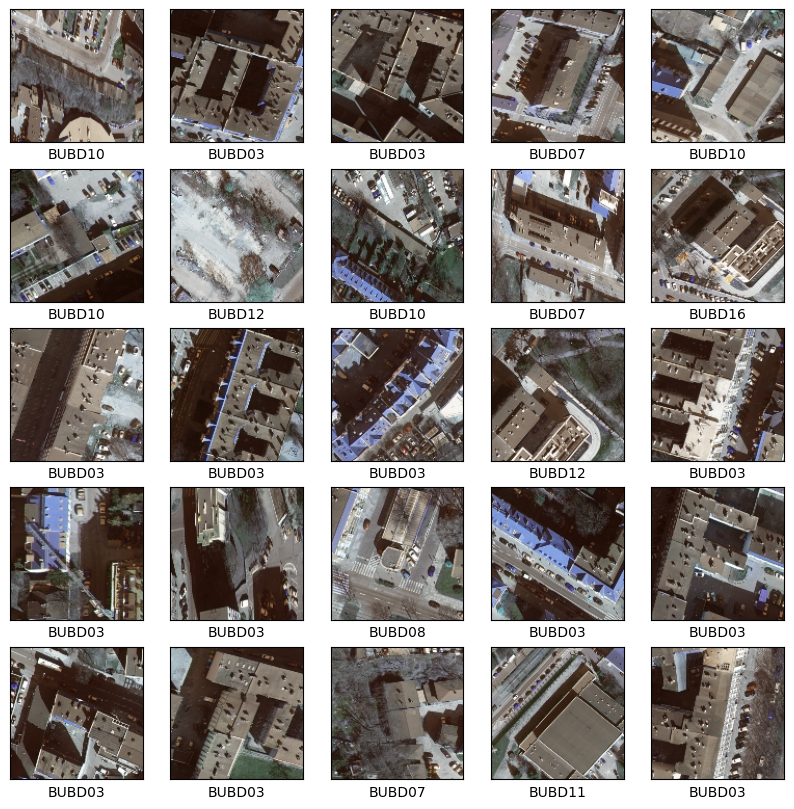

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])

    plt.xlabel(Categories[y[i]])
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

print('Training data shape:', X_train.shape,y_train.shape)
print('Testing data shape:', X_test.shape,y_test.shape)

#normalizacja 0-1


X_train = X_train.astype('float32')/255
#X_train = X_train / 255
X_test = X_test.astype('float32')/255

#x_train = np.asarray(X_train.tolist())
#x_test = np.asarray(X_test.tolist())

# x_train_mean = np.mean(X_train)
# x_train_std = np.std(X_train)

# x_test_mean = np.mean(X_test)
# x_test_std = np.std(X_test)

# X_train = (X_train - x_train_mean)/x_train_std
# X_test = (X_test - x_test_mean)/x_test_std


Training data shape: (2349, 128, 128, 3) (2349, 11)
Testing data shape: (784, 128, 128, 3) (784, 11)


In [7]:
'''
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3),input_shape=(128, 128, 3),activation='relu',padding='same'))
#model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
#model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.30))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.40))
model.add(Dense(11, activation='softmax'))#liczba klas 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=optimizer ,metrics=['accuracy'])
x = plot_model(model, to_file='model_dis.png', show_shapes=True, show_layer_names=True)
x
'''

'\nmodel = Sequential()\nmodel.add(Conv2D(filters=32, kernel_size=(3, 3),input_shape=(128, 128, 3),activation=\'relu\',padding=\'same\'))\n#model.add(Conv2D(32, (3, 3), activation=\'relu\',padding=\'same\'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Conv2D(64, (3, 3), activation=\'relu\',padding=\'same\'))\n#model.add(Conv2D(64, (3, 3), activation=\'relu\',padding=\'same\'))\nmodel.add(MaxPooling2D((2, 2)))\nmodel.add(Dropout(0.30))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation=\'relu\'))\nmodel.add(Dropout(0.40))\nmodel.add(Dense(11, activation=\'softmax\'))#liczba klas \noptimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)\nmodel.compile(loss="categorical_crossentropy", optimizer=optimizer ,metrics=[\'accuracy\'])\nx = plot_model(model, to_file=\'model_dis.png\', show_shapes=True, show_layer_names=True)\nx\n'

In [7]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3),input_shape=(128, 128, 3),activation='relu',padding='same'))
#model.add(Conv2D(16, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
#model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))#liczba klas 
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="categorical_crossentropy", optimizer=optimizer ,metrics=['accuracy'])
              
#history =model.fit(X_train, y_train, epochs=100,verbose=1,validation_split=0.1, batch_size=16)



c:\Users\pawel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64, 64, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0

In [9]:
x_train_all, x_validate, y_train_all, y_validate = train_test_split(X_train, y_train, test_size = 0.1)

In [10]:
from keras.preprocessing.image import ImageDataGenerator
# Rozszerzenie danych
datagen = ImageDataGenerator(
        
        rotation_range=20,  # losowa rotacja
        zoom_range = 0.15, # losowy zoom 
        shear_range=0.1,
        width_shift_range=0.1,  # losowy shift horizontally 
        height_shift_range=0.1,  # losowy shift vertically 
        horizontal_flip=False,  # losowy flip 
        vertical_flip=False,  # losowy flip 
        zca_whitening=False)  # ZCA whitening

datagen.fit(x_train_all)


#Walidacja datagen 
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
datagen

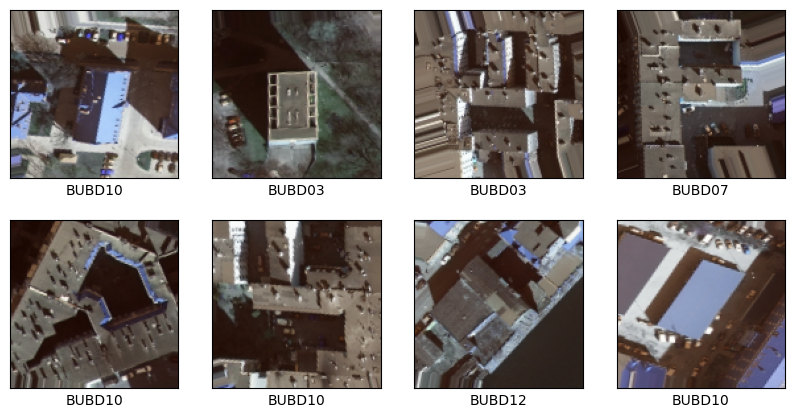

In [12]:
plt.figure(figsize=(10,5))



pic = datagen.flow(X, batch_size =1)
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    batch = pic.next()
    image_ = batch[0].astype('uint32')
    plt.imshow(image_)

    plt.xlabel(Categories[y[i]])
plt.show()

In [13]:
epochs = 100
batch_size = 64
history = model.fit_generator(datagen.flow(x_train_all,y_train_all, batch_size=batch_size),epochs = epochs, validation_data=(x_validate,y_validate),
                    verbose = 1)
                              

C:\Users\pawel\AppData\Local\Temp\ipykernel_28520\2405755754.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train_all,y_train_all, batch_size=batch_size),epochs = epochs, validation_data=(x_validate,y_validate),


Epoch 1/100
34/34 [==============================] - 23s 617ms/step - loss: 2.5735 - accuracy: 0.3477 - val_loss: 3.0504 - val_accuracy: 0.0426
Epoch 2/100
34/34 [==============================] - 23s 677ms/step - loss: 2.0114 - accuracy: 0.5038 - val_loss: 2.1116 - val_accuracy: 0.3574
Epoch 3/100
34/34 [==============================] - 26s 741ms/step - loss: 1.7288 - accuracy: 0.5913 - val_loss: 1.8721 - val_accuracy: 0.6213
Epoch 4/100
34/34 [==============================] - 39s 1s/step - loss: 1.5389 - accuracy: 0.6310 - val_loss: 2.1556 - val_accuracy: 0.3660
Epoch 5/100
34/34 [==============================] - 24s 709ms/step - loss: 1.4217 - accuracy: 0.6637 - val_loss: 3.7182 - val_accuracy: 0.0170
Epoch 6/100
34/34 [==============================] - 28s 824ms/step - loss: 1.3842 - accuracy: 0.6736 - val_loss: 3.2630 - val_accuracy: 0.0766
Epoch 7/100
34/34 [==============================] - 25s 741ms/step - loss: 1.2936 - accuracy: 0.6902 - val_loss: 1.6837 - val_accuracy: 0.

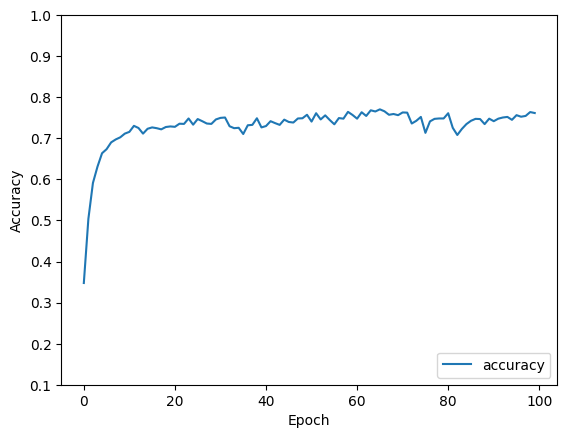

8/8 [==============================] - 1s 73ms/step - loss: 1.0087 - accuracy: 0.6894
0.6893616914749146
1.0086954832077026


In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model.evaluate(x_validate,  y_validate, verbose=1)
print(test_acc)
print(test_loss)

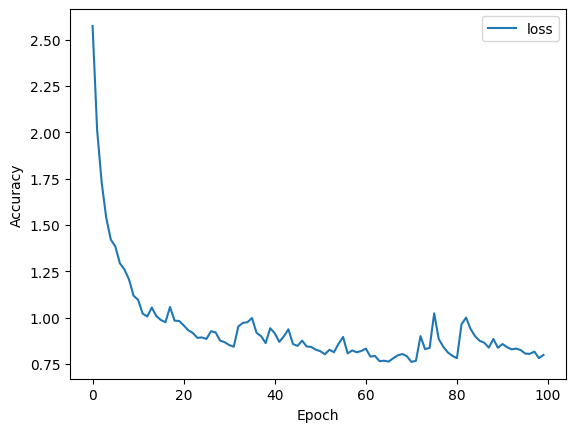

In [21]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0, 10])
plt.legend(loc='upper right')
plt.show()

In [22]:
model.save("new3_good_model_100epoc.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
#from keras.models import load_model

#new =load_model('history_model_100epochs_1.h5')
#new.summary()
#score_new = new.evaluate(X_train, y_train,  verbose=1)
#print("%s: %.2f%%" % (model.metrics_names[1], score_new[1]*100))

25/25 [==============================] - 2s 79ms/step


Text(0.5, -20.35277777777778, 'Predicted label')

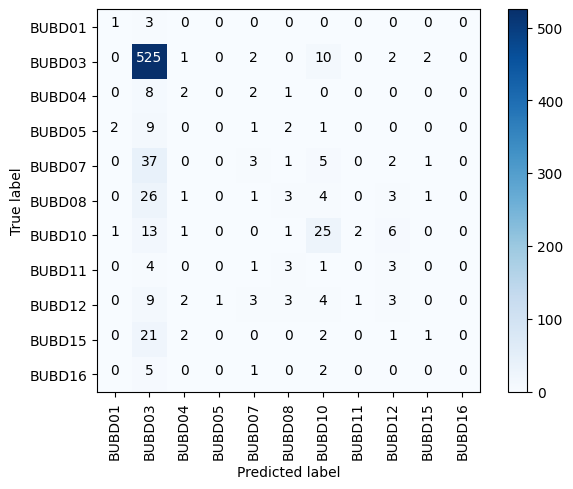

In [33]:
from sklearn.metrics import confusion_matrix
import itertools
cmap=plt.cm.Blues
classes = Categories

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Y_pred_classes = to_categorical(Y_pred_classes) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plt.figure()
plt.imshow(confusion_mtx, interpolation='nearest', cmap=cmap)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=90)
plt.yticks(tick_marks, classes)

thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
             horizontalalignment="center",
             color="white" if confusion_mtx[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.xlabel.set
# plot the confusion matrix


Text(0, 0.5, 'Fraction classified incorrectly')

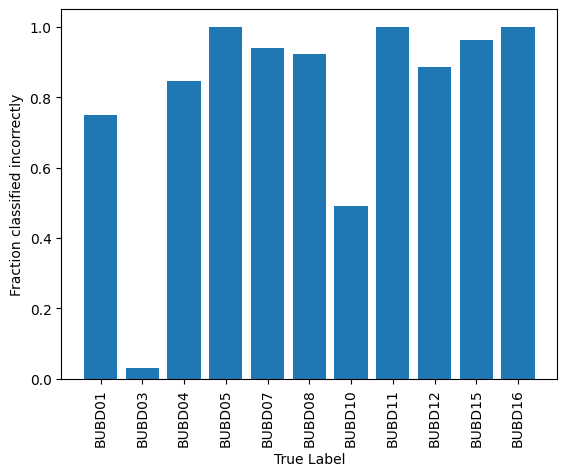

In [24]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(Categories,label_frac_error)
plt.xticks( rotation=90)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

In [32]:
predictions = model.predict(X_test)  
pred_labels = np.argmax(predictions, axis = 1)
#pred_labels= to_categorical(pred_labels)
test_labels_vector = np.argmax(y_test, axis = 1)
#test_labels_vector = to_categorical(test_labels_vector)

25/25 [==============================] - 2s 76ms/step


In [31]:
def classification_evaluation(classification, predicted_labels, test_labels, test_images):
    if classification== "prawidłowo":
        indices_list = np.where(predicted_labels == test_labels)[0]
    else:
        indices_list = np.where(predicted_labels!= test_labels)[0]
    test_images_filtered= [test_images[i] for i in indices_list]
    images_labels_original= [test_labels[i] for i in indices_list]
    images_labels_predicted= [pred_labels[i] for i in indices_list]
    print(f"{len(test_images_filtered)} images were classified {classification.upper()} out of a total of {len(test_images)} in the Test dataset")

    unique, counts = np.unique(images_labels_original, return_counts=True)
    for i in range(0,len(unique)):
        print(f"for category {unique[i]} the number of {classification.upper()} classified images were: {counts[i]}")
        
    # Plot some of the misclassified images
    print("\n\n")
    fig,ax=plt.subplots(2,3)
    #fig.suptitle(f"Przykładowe {classification} sklasyfikowane obrazy", fontsize=15)
    fig.set_size_inches(7,7)
    for i in range(2):
        for j in range (3):
            l=random.randint(0,len(test_images_filtered))
            #l=Categories
            ax[i,j].grid(False)
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].imshow(test_images_filtered[l])
            ax[i,j].set_title("Predykcja klasy: "+str(Categories[images_labels_predicted[l]])+"\n"+"Aktualna klasa: "+str(Categories[images_labels_original[l]]))
            
    plt.tight_layout()
    

563 images were classified PRAWIDŁOWO out of a total of 784 in the Test dataset
for category 0 the number of PRAWIDŁOWO classified images were: 1
for category 1 the number of PRAWIDŁOWO classified images were: 525
for category 2 the number of PRAWIDŁOWO classified images were: 2
for category 4 the number of PRAWIDŁOWO classified images were: 3
for category 5 the number of PRAWIDŁOWO classified images were: 3
for category 6 the number of PRAWIDŁOWO classified images were: 25
for category 8 the number of PRAWIDŁOWO classified images were: 3
for category 9 the number of PRAWIDŁOWO classified images were: 1





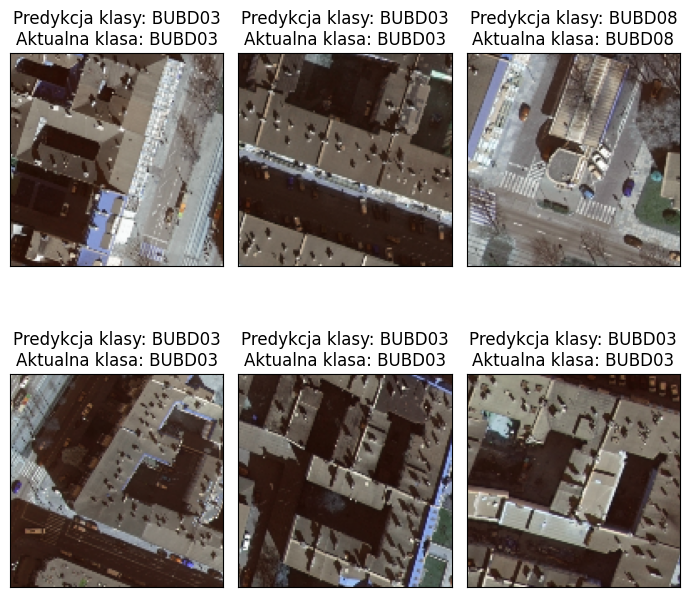

In [29]:
classification_evaluation("prawidłowo", pred_labels, test_labels_vector, X_test)